<a href="https://colab.research.google.com/github/saipragna25/deep-learning-asgn1/blob/main/DLA1_unet_learner_for_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastai.imports import *
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
fnames = get_image_files(path/'images')
def label_func(x): return path/'labels'/f'{x.stem}_P{x.suffix}'
codes = np.loadtxt(path/'codes.txt', dtype=str)
dls = SegmentationDataLoaders.from_label_func(path, fnames, label_func, codes=codes)

In [ ]:
learn = unet_learner(dls, models.resnet34, loss_func=CrossEntropyLossFlat(axis=1), y_range=(0,1))

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

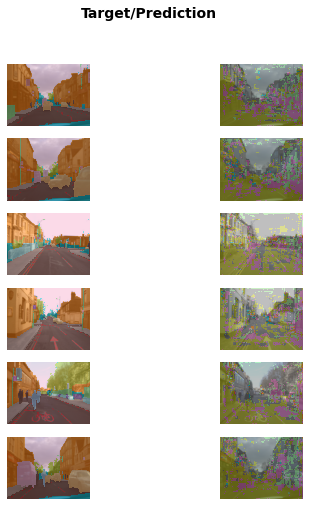

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))